In [1]:
import pandas as pd

In [3]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

# import Data

In [9]:
from sklearn.datasets import load_digits

In [11]:
df = load_digits()

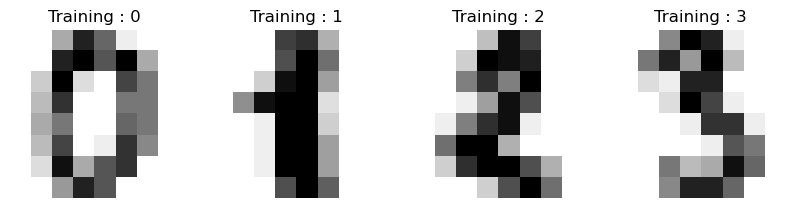

In [20]:
 _, axes = plt.subplots(nrows = 1, ncols =4 ,figsize =(10,3))
 for ax, image, label in zip (axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image ,cmap =plt.cm.gray_r , interpolation ="nearest")
    ax.set_title("Training : %i"  % label)

In [23]:
df.images.shape

(1797, 8, 8)

In [25]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [27]:
df.images[0].shape

(8, 8)

In [29]:
len(df.images)

1797

In [31]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [33]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [35]:
data[0].shape

(64,)

In [37]:
data.shape

(1797, 64)

# Scaling Image Data

In [40]:
data.min()

0.0

In [42]:
data.max()

16.0

In [45]:
data=data/16

In [48]:
data.min()

0.0

In [50]:
data.max()

1.0

In [52]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [55]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test, y_train , y_test = train_test_split(data, df.target ,test_size=0.3)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()

In [85]:
rf.fit(X_train ,y_train)

RandomForestClassifier()

# Predict Test Data

In [94]:
y_pred  = rf.predict(X_test)

In [96]:
y_pred

array([7, 3, 1, 8, 6, 8, 3, 2, 4, 7, 8, 5, 6, 0, 3, 1, 9, 6, 2, 0, 4, 6,
       9, 4, 6, 2, 4, 6, 2, 5, 0, 4, 9, 4, 0, 3, 1, 8, 5, 3, 4, 1, 6, 5,
       7, 3, 9, 0, 9, 3, 4, 9, 1, 4, 6, 2, 9, 4, 4, 9, 9, 4, 7, 3, 3, 6,
       0, 2, 0, 1, 8, 4, 5, 1, 6, 0, 1, 4, 0, 1, 1, 8, 0, 2, 6, 7, 6, 5,
       9, 2, 8, 7, 2, 1, 7, 5, 7, 5, 7, 2, 6, 2, 9, 6, 6, 9, 2, 2, 3, 4,
       2, 3, 1, 2, 8, 5, 4, 9, 8, 5, 1, 7, 8, 0, 7, 7, 0, 4, 6, 2, 2, 0,
       5, 7, 0, 9, 2, 4, 2, 7, 3, 4, 1, 9, 9, 0, 9, 3, 2, 7, 8, 4, 2, 7,
       6, 2, 2, 3, 4, 1, 7, 1, 3, 3, 1, 1, 8, 7, 9, 7, 8, 2, 5, 7, 9, 0,
       6, 2, 8, 9, 7, 8, 0, 0, 0, 3, 5, 9, 8, 7, 5, 6, 0, 2, 7, 7, 5, 1,
       3, 9, 2, 3, 4, 5, 0, 4, 7, 8, 3, 0, 6, 3, 3, 6, 9, 3, 5, 8, 1, 3,
       3, 6, 0, 1, 1, 7, 9, 4, 8, 6, 0, 1, 9, 3, 2, 4, 2, 9, 2, 6, 1, 0,
       7, 9, 3, 0, 5, 2, 3, 5, 9, 6, 0, 6, 5, 1, 1, 0, 5, 5, 2, 7, 9, 7,
       6, 8, 4, 0, 1, 8, 6, 6, 9, 6, 5, 0, 1, 2, 7, 9, 0, 4, 2, 0, 7, 8,
       1, 8, 9, 6, 8, 4, 7, 8, 3, 0, 3, 3, 1, 4, 0,

# Model Accuracy

In [99]:
from sklearn.metrics import confusion_matrix , classification_report

In [101]:
confusion_matrix(y_test ,y_pred)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 51]], dtype=int64)

In [103]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.96      1.00      0.98        48
           2       1.00      1.00      1.00        57
           3       1.00      0.98      0.99        53
           4       0.96      0.96      0.96        52
           5       1.00      1.00      1.00        57
           6       1.00      0.98      0.99        56
           7       0.93      1.00      0.96        53
           8       0.98      0.95      0.96        55
           9       1.00      0.98      0.99        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# END